In [1]:
import torch
from IPython.core.debugger import set_trace

In [2]:
def f(x):
    res = x*x;
    set_trace();
    return res;

In [4]:
x = torch.randn(1,requires_grad=True);

In [4]:
import torch.nn as nn
import torch.nn.functional as f
from collections import OrderedDict

In [9]:
layers = OrderedDict([
    ('conv1', nn.Conv2d( in_channels=1, out_channels=20, kernel_size=5 )),
    ('relu1', nn.ReLU()),
    ('conv2', nn.Conv2d(20,64,5)),
    ('relu2', nn.ReLU()),
]);
model = nn.Sequential(layers);

# How to setup an NN

In [11]:
# Headline
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6 , out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net = Net()

# Torch Basics

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision

In [26]:
import matplotlib.pyplot as plt
from pprint import pprint 
import numpy as np
from IPython.core.debugger import set_trace
%matplotlib inline

In [29]:
from ppt.utils import attr #????

ModuleNotFoundError: No module named 'ppt'

# Tensors

In [6]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

import torch

In [7]:
np.eye(3)
torch.eye(3)
X=np.om.om((5,3))
Y=torch.((5,3))
X.shape
Y.shape
Y.add(1)
Y.add_(1)

tensor([[1.5560, 1.1167, 1.9000],
        [1.0048, 1.4674, 1.2177],
        [1.7482, 1.0088, 1.8164],
        [1.5379, 1.4993, 1.3801],
        [1.3318, 1.3685, 1.9420]])

In [8]:
inv(X.T @ X)
inv(Y.t() @ Y)

array([[ 3.86825   , -0.65661025, -2.8286517 ],
       [-0.65661025,  1.4453315 , -0.5123522 ],
       [-2.8286517 , -0.5123522 ,  2.8780181 ]], dtype=float32)

In [9]:
A = torch.eye(3)
A[0,0]
A[0]
A[:,1:3]
A.numpy()
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

# Autograd

In [10]:
from torch import autograd # you rarely use it directly

In [30]:
w = torch.ones(1, requires_grad=True)
w.requires_grad
z = torch.ones(1)*2
z.requires_grad
    total = torch.cos(w) + z
total.backward()

In [32]:
w.grad

tensor([-0.8415])

In [33]:
with torch.no_grad():
    total = w + z
    
total.requires_grad

False

# LinReg with PyTorch

(100,)


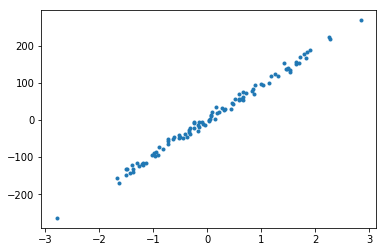

In [15]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import torch
n_features = 1
n_samples =  100
X, Y = make_regression(
    n_samples= n_samples,
    n_features = n_features,
    noise = 8
)
print(Y.shape)
fix,ax = plt.subplots()
ax.plot(X,Y,'.')
x = torch.from_numpy(X) #.float()
Y = torch.from_numpy(Y.reshape((n_samples,n_features))) #.float()


In [16]:
from torch import nn
from torch import optim
import torch
torch.set_default_tensor_type('torch.DoubleTensor');

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim,1,bias=True)
    
    def  forward(self, x):
        return 1.0*self.beta(x)

In [100]:
model = LinReg(n_features);
model = model.double();
optimizer = optim.SGD(model.parameters(),lr=0.00005)
criterion = nn.MSELoss()

In [ ]:
model.train();
optimizer.zero_grad();
y_ = model.forward(x);
loss = criterion(y_,Y);
loss.backward(loss);
optimizer.step();
# eval
for i in range(10000000):
    model.eval();
    with torch.no_grad():
        y_=model(x)
## vis
fig, ax = plt.subplots()
ax.plot(x.numpy(), y_.numpy(),'.', label='pred');
ax.plot(x.numpy(), Y.numpy(),'.', label='data');
ax.legend("MSE");
ax.legend();
print(loss.item())
print(list(model.parameters())[0].data.numpy())

In [93]:
import ppt

ModuleNotFoundError: No module named 'ppt'